In [15]:
# Importing required libraries
from bs4 import BeautifulSoup
import requests
import time
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import smtplib

In [3]:
# url which we want scrap using BeautifulSoup
url='https://www.imdb.com/chart/top/'

In [4]:
# using request library get the data content from that url link
text_content=requests.get(url)

In [5]:
# using BeautifulSoup read the data in html format
soup1=BeautifulSoup(text_content.content,'html.parser')

In [6]:
# using find function can find required content which we got from that web page html content using inspect tool
genral=soup1.find('tbody',class_='lister-list').find_all('tr')

In [7]:
print(len(genral))

250


In [8]:
# converted html data into the string format and nodify the the data 
e1=[]
for t in genral:
    try:
        
        
        t1=t.find('td',class_='titleColumn').get_text(strip=True)
        r=t.find('td',class_='ratingColumn imdbRating').get_text(strip=True)
        n=t1+r
        n1=n.split(')')
        n2=n1[0].split('.')
        rating=n1[1]
        rank=n2[0]
        n3=n2[1].split('(')
        title=n3[0]
        year=n3[1]
    except:
        print('none')

#     print(title)
#     print(rank)
#     print(rating)
#     print(year)
    
    e=[]
    e.append(title)
    e.append(rank)
    e.append(rating)
    e.append(year)
    e1.append(e)
    print(e)
    
    
    
    
    
    
    
    

['The Shawshank Redemption', '1', '9.2', '1994']
['The Godfather', '2', '9.2', '1972']
['The Dark Knight', '3', '9.0', '2008']
['The Godfather Part II', '4', '9.0', '1974']
['12 Angry Men', '5', '9.0', '1957']
["Schindler's List", '6', '8.9', '1993']
['The Lord of the Rings: The Return of the King', '7', '8.9', '2003']
['Pulp Fiction', '8', '8.8', '1994']
['The Lord of the Rings: The Fellowship of the Ring', '9', '8.8', '2001']
['Il buono, il brutto, il cattivo', '10', '8.8', '1966']
['Forrest Gump', '11', '8.8', '1994']
['Fight Club', '12', '8.7', '1999']
['The Lord of the Rings: The Two Towers', '13', '8.7', '2002']
['Inception', '14', '8.7', '2010']
['The Empire Strikes Back', '15', '8.7', '1980']
['The Matrix', '16', '8.7', '1999']
['GoodFellas', '17', '8.7', '1990']
["One Flew Over the Cuckoo's Nest", '18', '8.6', '1975']
['Se7en', '19', '8.6', '1995']
['Shichinin no samurai', '20', '8.6', '1954']
["It's a Wonderful Life", '21', '8.6', '1946']
['The Silence of the Lambs', '22', '8

In [10]:
# create the dataframe using scrapped data from website because for more manipulation of the data
movie=pd.DataFrame(e1)

In [16]:
movie.head()

,Title,Rank,Ratings,Release_year
0,The Shawshank Redemption,1,9.2,1994
1,The Godfather,2,9.2,1972
2,The Dark Knight,3,9.0,2008
3,The Godfather Part II,4,9.0,1974
4,12 Angry Men,5,9.0,1957


In [17]:
movie.columns=['Title','Rank','Ratings','Release_year']

<AxesSubplot:xlabel='Title', ylabel='Ratings'>

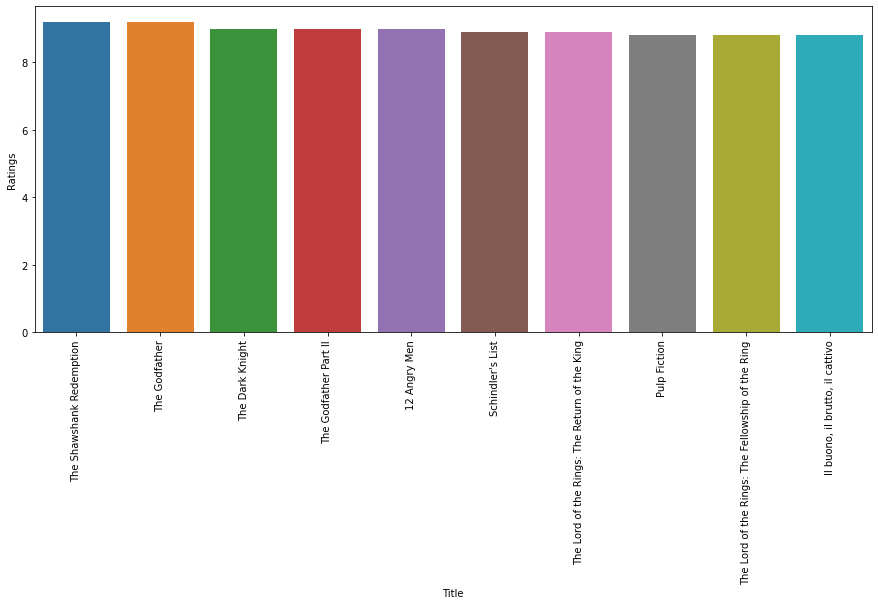

In [282]:
# Do some basic visualization using seaborn library which come fram scrapped data
plt.figure(figsize=[15,6])
plt.xticks(rotation=90)
sns.barplot(x=movie.sort_values(by='Ratings',ascending=False).iloc[0:10]['Title'],y=movie.sort_values(by='Ratings',ascending=False).iloc[0:10]['Ratings'])

In [277]:
movie['Ratings']=movie['Ratings'].astype(float)

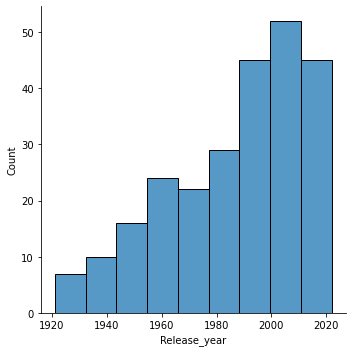

In [292]:
sns.displot(movie['Release_year'])

In [287]:
movie['Release_year']=movie['Release_year'].astype(float)

In [295]:
movie[movie['Release_year']>2012]

,Title,Rank,Ratings,Release_year
24,Interstellar,25,8.6,2014.0
33,Gisaengchung,34,8.5,2019.0
41,Whiplash,42,8.5,2014.0
62,Avengers: Infinity War,63,8.4,2018.0
65,Spider-Man: Into the Spider-Verse,66,8.3,2018.0
72,Coco,73,8.3,2017.0
74,Joker,75,8.3,2019.0
77,Avengers: Endgame,78,8.3,2019.0
87,Capharnaüm,88,8.3,2018.0
105,Top Gun: Maverick,106,8.2,2022.0
